<a href="https://colab.research.google.com/github/tansaurus/AI/blob/main/LogisticReg_%EC%98%A4%EA%B7%9C%EB%A6%AC_2021110876.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

In [ ]:
num_data = 2000
num_epoch = 30000

noise  = init.normal_(torch.FloatTensor(num_data,1),std=1)
x = init.uniform_(torch.Tensor(num_data,1),-20,20)
y = (x**2) + 3
y_noise = y + noise

In [ ]:
model = nn.Sequential(
    nn.Linear(1,10),
    nn.ReLU(),
    nn.Linear(10,20),
    nn.ReLU(),
    nn.Linear(20,20),
    nn.ReLU(),
    nn.Linear(20,10),
    nn.ReLU(),
    nn.Linear(10,1)
)

loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr = 0.001)

In [ ]:
loss_array = []
for i in range(num_epoch):
  optimizer.zero_grad()
  output = model(x)

  loss = loss_func(output, y_noise)
  loss.backward()
  optimizer.step()

  loss_array.append(loss.detach().numpy())

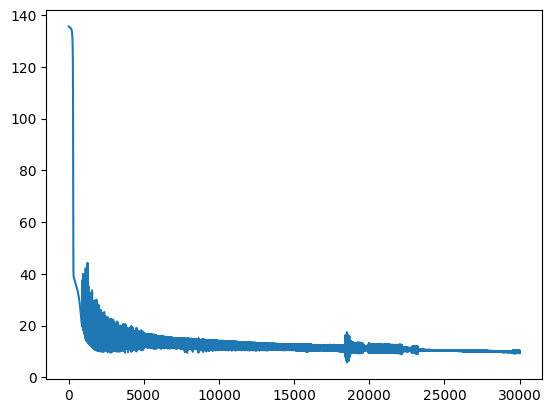

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_array)
plt.show()

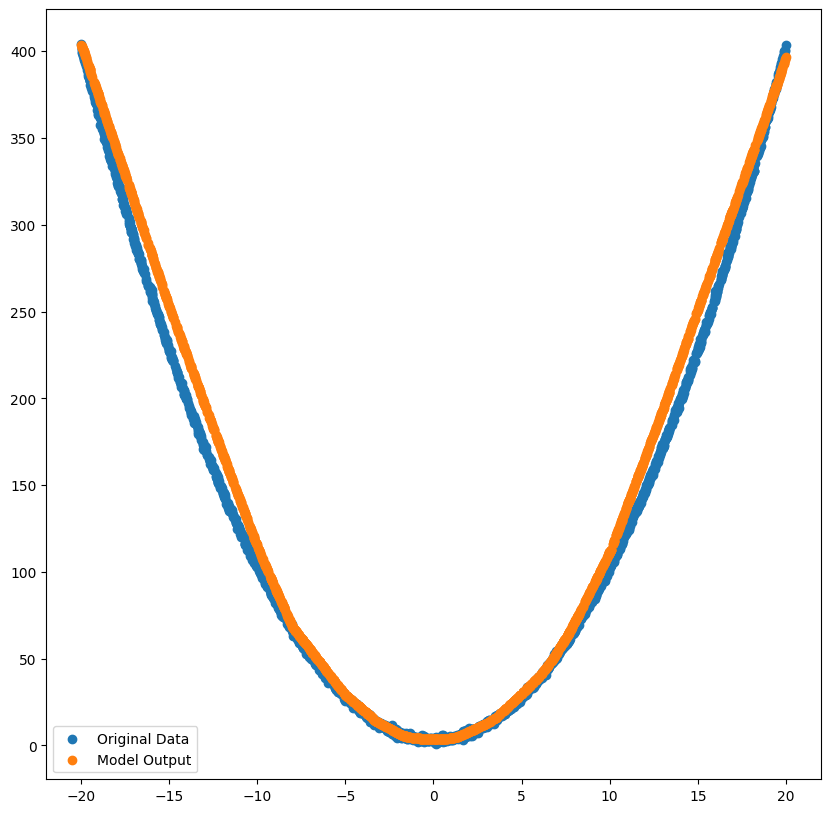

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x.detach().numpy(), y_noise, label="Original Data")
plt.scatter(x.detach().numpy(), output.detach().numpy(), label="Model Output")
plt.legend()
plt.show()